In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
font_path = "C:/Windows/Fonts/H2HDRM.TTF"
font = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font)
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/submission.csv")

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
train.info()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dt

In [6]:
train.isna().sum()
print(test.isna().sum())

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


* train, test에 결측값이 다수 존재함을 알 수 있다.

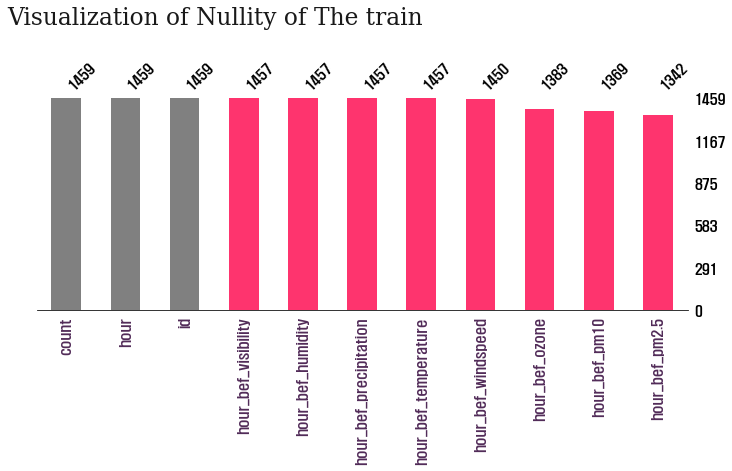

In [7]:
color = ["grey", "grey", "grey", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e"]
fig, ax = plt.subplots(figsize = (12, 4), dpi = 70)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
msno.bar(train.iloc[:, :], sort = "descending", color = color, ax = ax, fontsize = 14, labels = "off", filter = "top")
ax.text(-1, 1.35, "Visualization of Nullity of The train", {"font": "Serif", "Size": 24, "color": "black"}, 
        alpha = 0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center", 
                   **{"Size": 14, "weight": "normal", "color": "#512b58"}, alpha = 1)
ax.set_yticklabels("")
ax.spines["bottom"].set_visible(True)
fig.show()

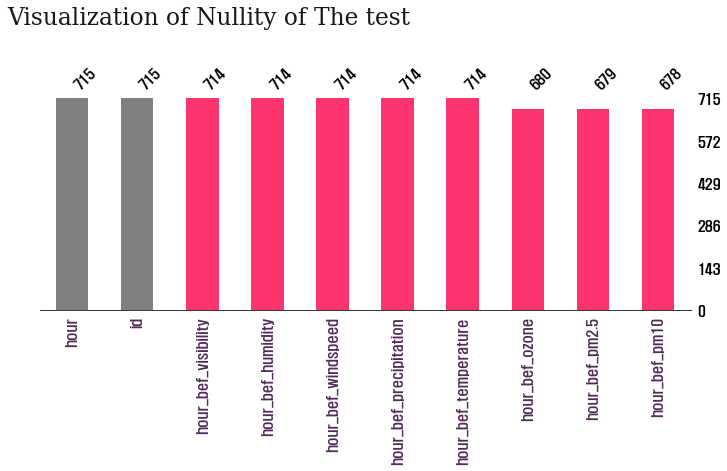

In [8]:
color = ["grey", "grey", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e", "#fe346e"]
fig, ax = plt.subplots(figsize = (12, 4), dpi = 70)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
msno.bar(test.iloc[:, :], sort = "descending", color = color, ax = ax, fontsize = 14, labels = "off", filter = "top")
ax.text(-1, 1.35, "Visualization of Nullity of The test", {"font": "Serif", "Size": 24, "color": "black"}, 
        alpha = 0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center", 
                   **{"Size": 14, "weight": "normal", "color": "#512b58"}, alpha = 1)
ax.set_yticklabels("")
ax.spines["bottom"].set_visible(True)
fig.show()

* 결측값의 분포를 보기 위해 시각화를 해보았다.

In [9]:
train.groupby("hour")["hour_bef_precipitation"].mean()

hour
0     0.016949
1     0.049180
2     0.049180
3     0.032787
4     0.016393
5     0.016393
6     0.016393
7     0.016393
8     0.032787
9     0.016393
10    0.016393
11    0.000000
12    0.016393
13    0.016667
14    0.065574
15    0.065574
16    0.050000
17    0.100000
18    0.016667
19    0.032787
20    0.049180
21    0.016667
22    0.032787
23    0.016393
Name: hour_bef_precipitation, dtype: float64

* 시간별 강수량 평균이 현저히 적기 때문에 결측값은 0으로 대체하는 것이 나을 것 같다.

In [10]:
def null_trans(df, var1, var2, scale):
    df[var1].fillna(df.groupby(var2)[var1].transform(scale), inplace = True)

In [11]:
null_trans(train, "hour_bef_visibility", "hour", "mean")
null_trans(train, "hour_bef_temperature", "hour", "mean")
null_trans(train, "hour_bef_humidity", "hour", "mean")
null_trans(train, "hour_bef_windspeed", "hour", "mean")
null_trans(train, "hour_bef_ozone", "hour", "mean")
null_trans(train, "hour_bef_pm10", "hour", "mean")
null_trans(train, "hour_bef_pm2.5", "hour", "mean")
train["hour_bef_precipitation"].fillna(0, inplace = True)

In [12]:
null_trans(test, "hour_bef_visibility", "hour", "mean")
null_trans(test, "hour_bef_temperature", "hour", "mean")
null_trans(test, "hour_bef_humidity", "hour", "mean")
null_trans(test, "hour_bef_windspeed", "hour", "mean")
null_trans(test, "hour_bef_ozone", "hour", "mean")
null_trans(test, "hour_bef_pm10", "hour", "mean")
null_trans(test, "hour_bef_pm2.5", "hour", "mean")
test["hour_bef_precipitation"].fillna(0, inplace = True)

* train, test의 강수량을 제외한 변수들은 시간별 평균으로 결측값을 대체하였고 강수량은 0으로 대체하였다.

In [13]:
train[train["hour_bef_ozone"].isna() == True]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
142,208,1,18.8,0.0,1.1,61.0,2000.0,NaN,NaN,NaN,62.0
147,220,1,18.4,0.0,3.1,31.0,2000.0,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


* hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 결측값이 대체되지 않아서 확인해보니 1시에 세 변수가 모두 결측값으로 이루어져 있음을 알 수 있었다.

In [14]:
def fill_na(df, column) :
    df[column] = df[column].fillna(value = df[column].mean())

* 그래서 전체 평균으로 대체하기로 하였다.

In [15]:
fill_na(train, "hour_bef_ozone")
fill_na(train, "hour_bef_pm10")
fill_na(train, "hour_bef_pm2.5")

In [16]:
fill_na(test, "hour_bef_ozone")
fill_na(test, "hour_bef_pm10")
fill_na(test, "hour_bef_pm2.5")

In [17]:
# def rain(df):
    # if df["hour_bef_temperature"] > 0 and df["hour_bef_precipitation"] == 1:
        # df["rain"] = 1
    # else:
        # df["rain"] = 0
    # return df["rain"]

In [18]:
# train["hour_bef_rain"] = train.apply(rain, axis = 1)
# test["hour_bef_rain"] = test.apply(rain, axis = 1)

In [19]:
# train = train[["id", "hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity", 
               # "hour_bef_visibility", "hour_bef_ozone", "hour_bef_rain", "hour_bef_pm10", "hour_bef_pm2.5", "count"]]
# test = test[["id", "hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity", 
             # "hour_bef_visibility", "hour_bef_ozone", "hour_bef_rain", "hour_bef_pm10", "hour_bef_pm2.5"]]

In [20]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [21]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

* 결측값이 모두 대체되었음을 알 수 있다.

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, '시간별 대여량')]

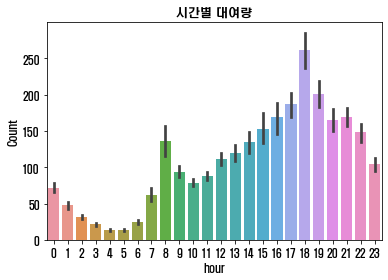

In [22]:
figure, ((ax1)) = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = train, x = "hour", y = "count", ax = ax1)
ax1.set(ylabel = "Count", title = "시간별 대여량")

* 아침 출근시간 저녁 퇴근시간에 밀집되어 있음을 알 수 있다.

In [23]:
num_cols = []
for col in train.columns:
    if train[col].dtypes != "object":
        num_cols.append(col)

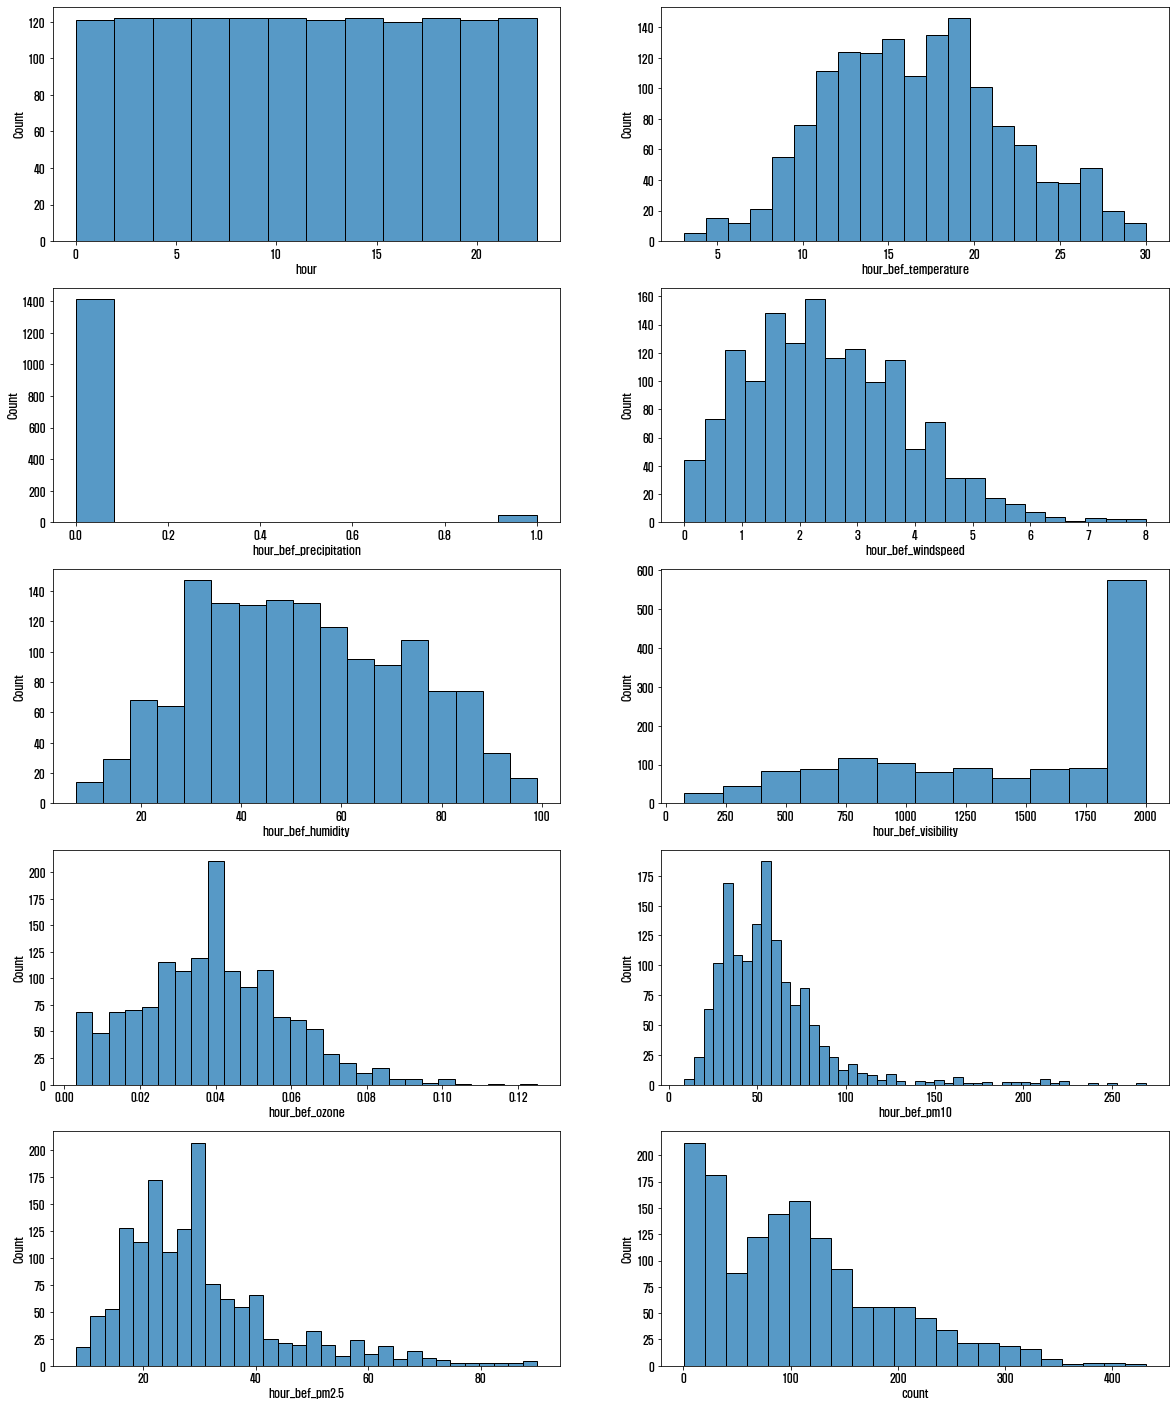

In [24]:
numcols_reduced = num_cols[1 :]
fig = plt.figure(figsize = (20, 25))
for i, n in enumerate(numcols_reduced):
    plt.subplot(len(numcols_reduced) / 2, 2, i + 1)
    sns.histplot(train[n])

* 몇몇 변수들이 기울어진 분포를 가지고 있음을 알 수 있다.

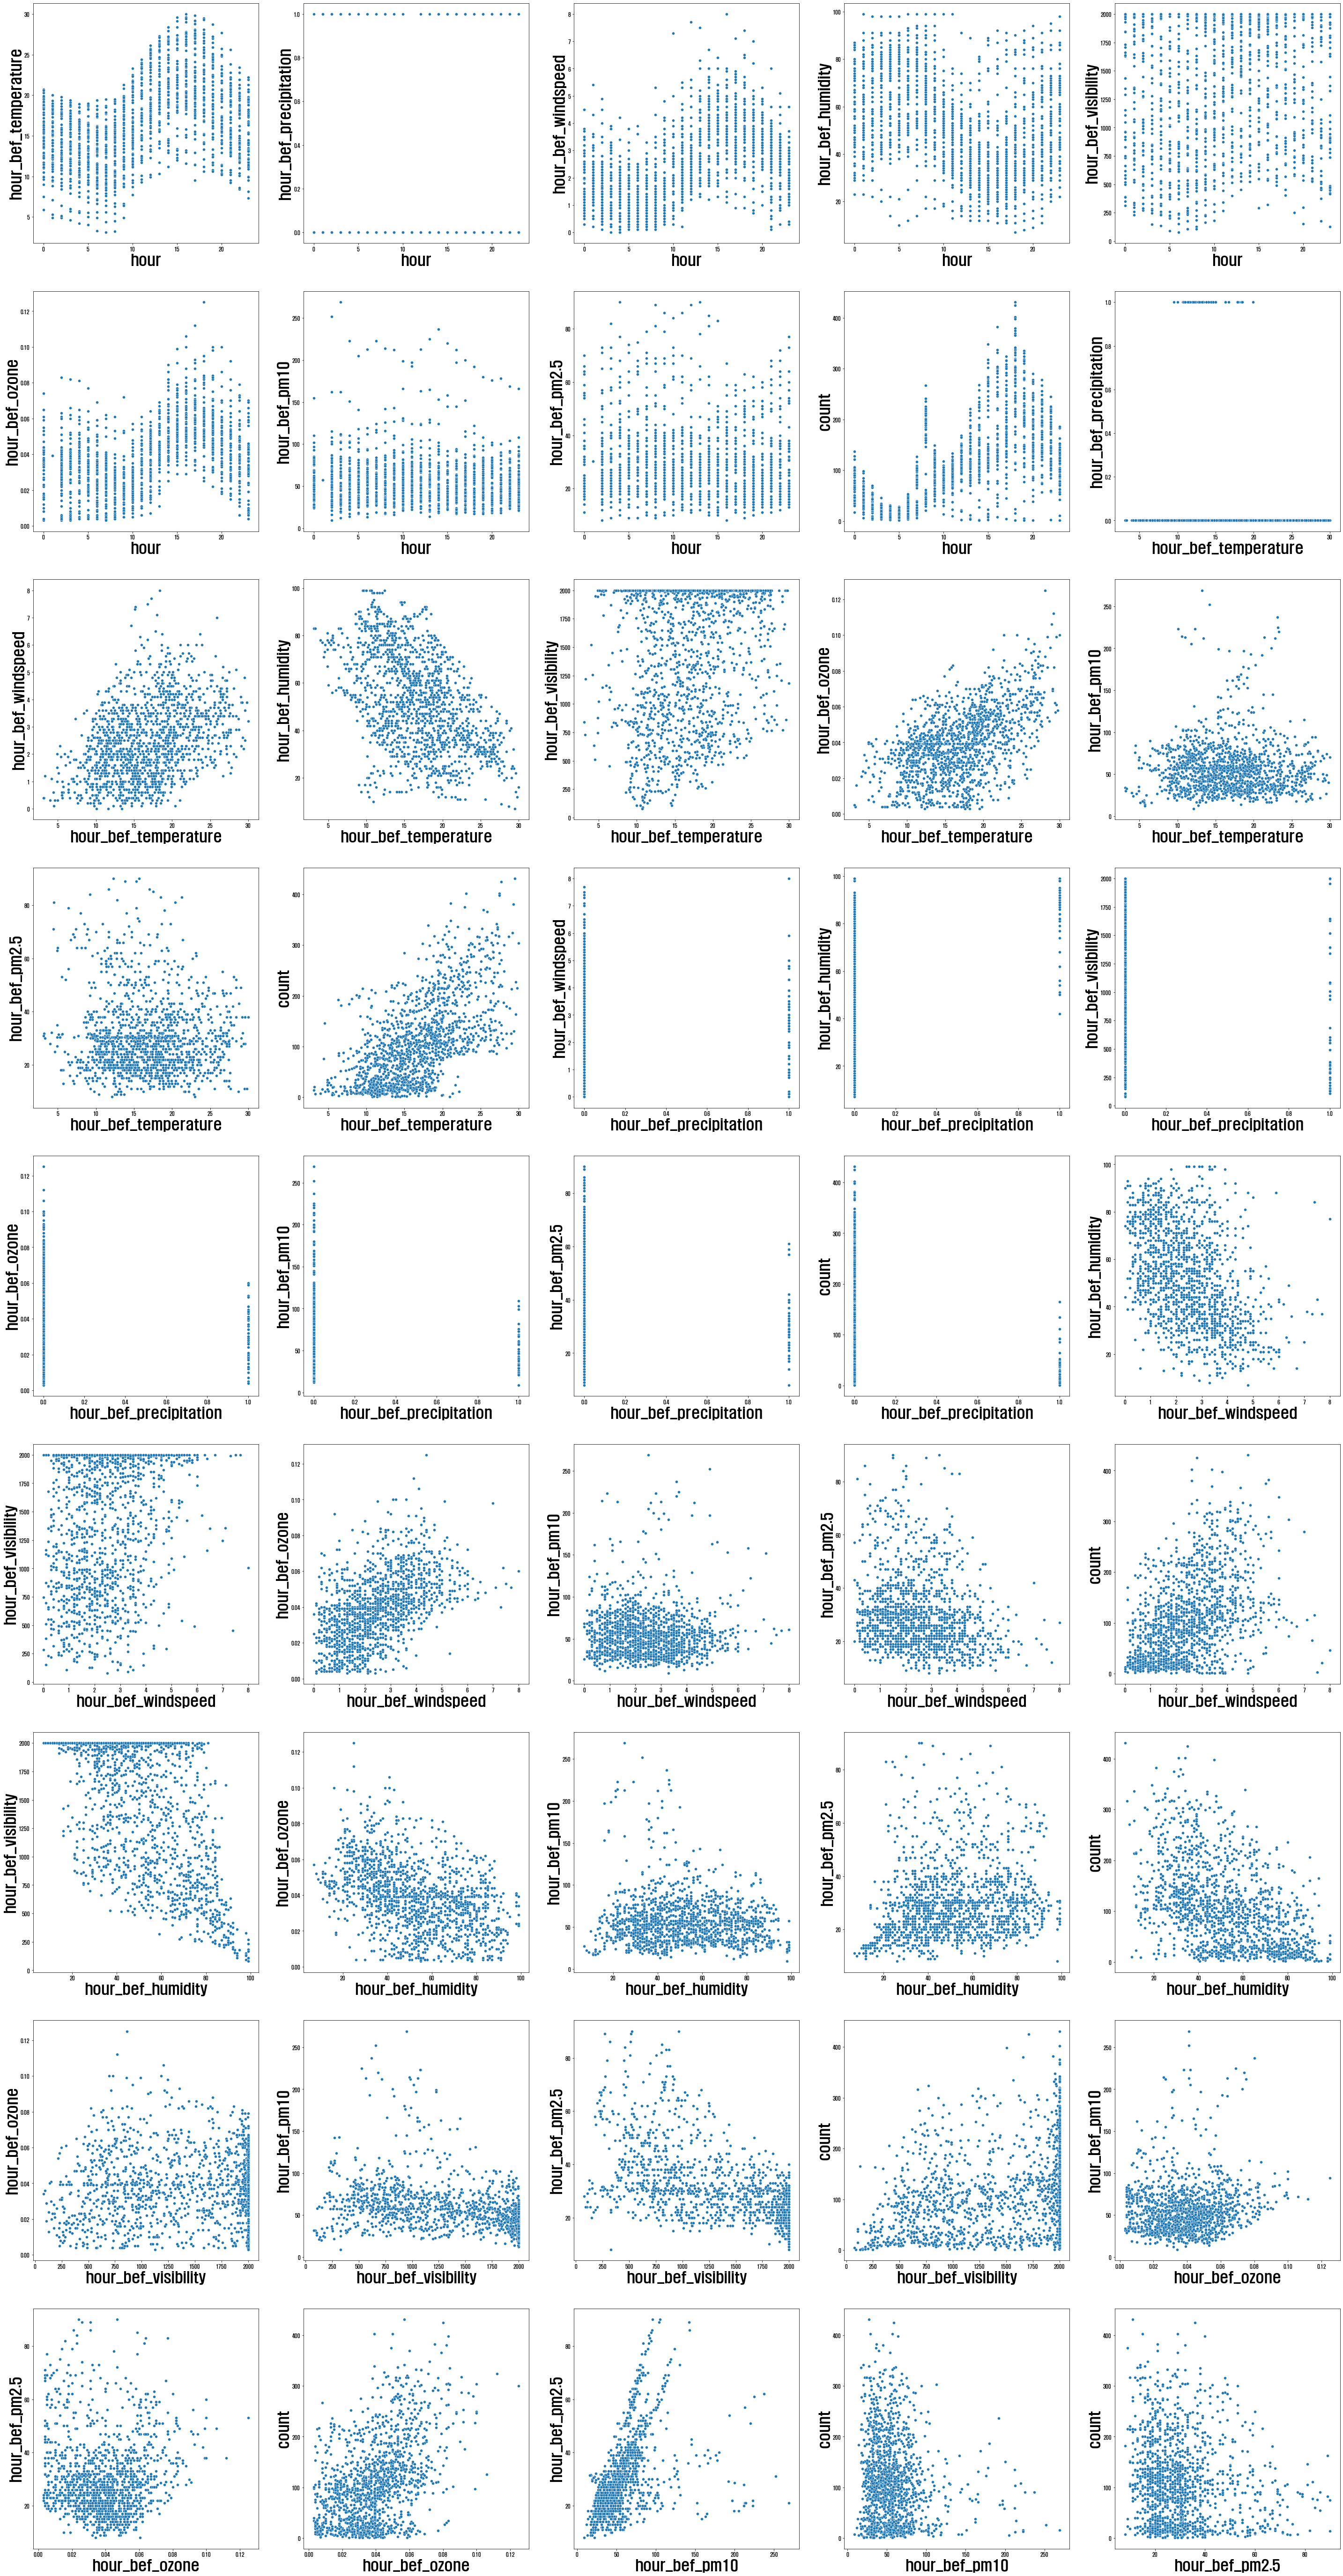

In [25]:
fig, ax = plt.subplots(9, 5)
count1, count2 = 0, 0
for i in range(len(numcols_reduced)):
    for j in range(len(numcols_reduced)):
        if i < j:
            p = sns.scatterplot(train[numcols_reduced].iloc[:, i], train[numcols_reduced].iloc[:, j], ax = ax[count1, count2])
            p.figure.set_figwidth(50)
            p.figure.set_figheight(100)
            p.set_xlabel(numcols_reduced[i], fontsize = 30)
            p.set_ylabel(numcols_reduced[j], fontsize = 30)
            count2 += 1
            if count2 > 4:
                count2 = 0
                count1 += 1

Text(-3, -2.065, 'Heatmap of Parking_tr')

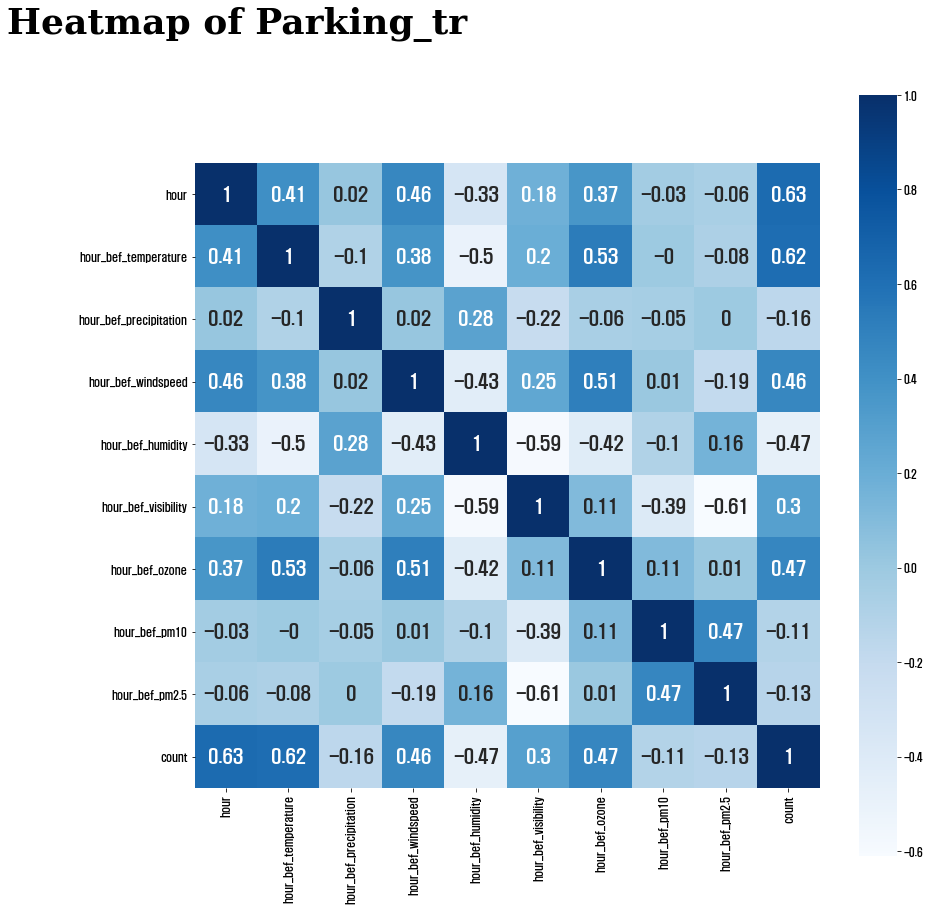

In [26]:
train_cor = train[numcols_reduced]
plt.figure(figsize = (14, 14))
corrmat = train_cor.corr().round(2)
g = sns.heatmap(data = corrmat, annot = True, cmap = "Blues", square = True, annot_kws = {"size": 18})
g.text(-3, -2.065, "Heatmap of Parking_tr", {"font": "serif", "size": 36, "weight": "bold"})

* 확실히 온도랑 시간이 count와 강한 양의 상관관계를 가짐을 알 수 있다.
* 습도와는 음의 상관관계를 가지므로 적당히 따스한 날씨에 사람들이 많이 탐을 알 수 있다.

In [27]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def X_filter_multicollinearity(X, thresh = 10):
    # variables = list(range(X.shape[1]))
    # dropped = True
    # while dropped:
        # dropped = False
        # vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) 
               # for ix in range(X.iloc[:, variables].shape[1])]
        # maxloc = vif.index(max(vif))
        # if max(vif) > thresh:
            # print("==> [Dropped variable] : " + X.iloc[:, variables].columns[maxloc])
            # del variables[maxloc]
            # if len(variables) > 1:
                # dropped = True
    # print("[Remaining variables] :")
    # print(X.columns[variables])

In [28]:
# train_test = pd.concat([train.iloc[:, 1 : -1], test.iloc[:, 1 :]])

In [29]:
# X_filter_multicollinearity(train_test)

In [30]:
X_train = train[["hour", "hour_bef_windspeed", "hour_bef_humidity", "hour_bef_visibility", "hour_bef_ozone",
                 "hour_bef_pm10", "hour_bef_pm2.5", "hour_bef_temperature", "hour_bef_precipitation"]]
y_train = train["count"]
X_test = test[["hour", "hour_bef_windspeed", "hour_bef_humidity", "hour_bef_visibility", "hour_bef_ozone", 
               "hour_bef_pm10", "hour_bef_pm2.5", "hour_bef_temperature", "hour_bef_precipitation"]]

In [31]:
# from sklearn.metrics import make_scorer
# def rmsle(predicted_values, actual_values):
    # predicted_values = np.array(predicted_values)
    # actual_values = np.array(actual_values)
    # log_predict = np.log(predicted_values + 1)
    # log_actual = np.log(actual_values + 1)
    # difference = log_predict - log_actual
    # difference = np.square(difference)
    # mean_difference = difference.mean()
    # score = np.sqrt(mean_difference)
    # return score
# rmsle_scorer = make_scorer(rmsle)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([("scaler", StandardScaler())])
X_train_fit = my_pipeline.fit(X_train)
X_train_pre = X_train_fit.transform(X_train)
X_test_pre = X_train_fit.transform(X_test)

In [33]:
def my_regressor(df_X, df_y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge, Lasso, ElasticNet
    from sklearn.linear_model import ARDRegression, BayesianRidge
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)
    import ast
    import numpy as np
    linear = LinearRegression()
    ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
    ardr_linear, bayesian_ridge = ARDRegression(), BayesianRidge()
    random_forest = RandomForestRegressor()
    xgboost_linear = XGBRegressor()
    my_model_list = ["linear", "ridge", "lasso", "elasticnet", "ardr_linear", 
                     "bayesian_ridge", "random_forest", "xgboost_linear"]
    score_dic = dict()
    for model_nm in my_model_list:
        scores = cross_val_score(eval(model_nm), df_X, df_y, cv = k_fold, scoring = "neg_mean_squared_error")
        rmse_score = np.sqrt(-scores)
        rmse_sm = rmse_score.mean()
        score_dic[model_nm] = rmse_sm
    score_dic = sorted(score_dic.items(), key = lambda t: t[1])
    return score_dic[0]

In [34]:
linear_model_train_score = my_regressor(X_train_pre, y_train)
print(linear_model_train_score)

('random_forest', 38.527433543838356)


* 랜덤포레스트 모델이 가장 낮은 RMSE를 가짐을 알 수 있다.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [36]:
model = RandomForestRegressor(n_estimators = 1000, criterion = "mse", n_jobs = -1, random_state = 0)

In [37]:
model.fit(X_train_pre, y_train)
predictions = model.predict(X_test_pre)

In [38]:
submission["count"] = predictions
submission

,id,count
0,0,88.867
1,1,215.699
2,2,77.801
3,4,30.107
4,5,74.660
...,...,...
710,2148,58.595
711,2149,70.416
712,2165,122.578
713,2166,159.149


In [39]:
submission.to_csv("Submission.csv", index = False)

[Text(0.5, 1.0, 'test')]

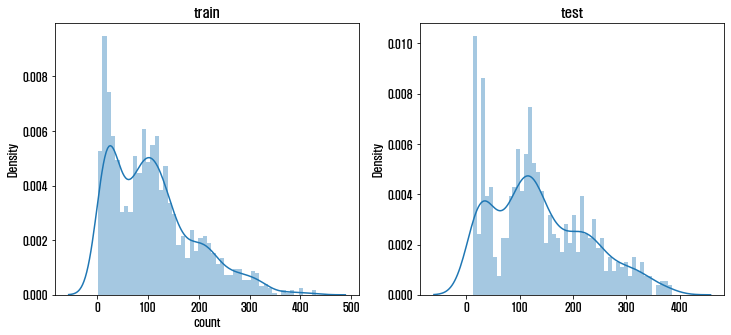

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)
sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

* train, test의 분포가 비슷한 형태를 띄고 있음을 알 수 있다.